In [ ]:
import numpy as np
import cv2

def NN_interpolation(img, scale): #最鄰近內插法
    srcH, srcW = img.shape
    dstH, dstW = int(srcH * scale), int(srcW * scale)
    retImg = np.zeros([dstH, dstW], dtype = 'uint8')

    for i in range(dstH):
        for j in range(dstW):
            srcX = round((i) * (srcH / dstH))
            srcY = round((j) * (srcW / dstW))

            if srcX >= srcW:
                srcX = srcW - 1
            if srcY >= srcH:
                srcY = srcH - 1

            retImg[i, j] = img[srcX, srcY]

    return retImg

def double_linear(input_signal, zoom_multiples): #雙線性內插法
    input_row, input_col = input_signal.shape
    output_row = int(input_row * zoom_multiples)
    output_col = int(input_col * zoom_multiples) 
    output_signal = np.zeros([output_row, output_col], dtype = 'uint8')

    for i in range(output_row):
        for j in range(output_col):
            temp_x = i / output_row * input_row
            temp_y = j / output_col * input_col

            x1 = int(temp_x); y1 = int(temp_y)
            x2 = x1; y2 = y1 + 1
            x3 = x1 + 1; y3 = y1
            x4 = x1 + 1; y4 = y1 + 1  
            t = temp_x - x1; u = temp_y -y1

            if x4 >= input_row:
                x4 = input_row-1
                x2 = x4
                x1 = x4-1
                x3 = x4-1
            if y4 >= input_col:
                y4 = input_col-1
                y3 = y4
                y1 = y4-1
                y2 = y4-1

            output_signal[i, j] = (1 - t) * (1 - u) * input_signal[x1, y1] \
            + (1 - t) * u+ t * (1 - u) * input_signal[x3, y3] \
            + t * u * input_signal[x4, y4]

    return output_signal

original_array = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
scale = 5/3
result_array1 = NN_interpolation(original_array, scale)
result_array2 = double_linear(original_array, scale).astype(np.uint8)

print("original_array")
print(original_array)
print("result_array1")
print(result_array1)
print("result_array2")
print(result_array2)
print("用最鄰近內插法的結果:")
print("A :{}, B {}".format(result_array1[2, 2], result_array1[3, 3]))
print("用雙線性內插法的結果:")
print("A :{}, B {}".format(result_array2[2, 2], result_array2[3, 3]))

original_array
[[10 20 30]
 [40 50 60]
 [70 80 90]]
result_array1
[[10 20 20 30 30]
 [40 50 50 60 60]
 [40 50 50 60 60]
 [70 80 80 90 90]
 [70 80 80 90 90]]
result_array2
[[10  4 16  4 12]
 [28 29 37 36 40]
 [46 28 48 26 42]
 [63 64 73 72 78]
 [40 35 47 39 47]]
用最鄰近內插法的結果:
A :50, B 90
用雙線性內插法的結果:
A :48, B 72


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
enter scale: 5


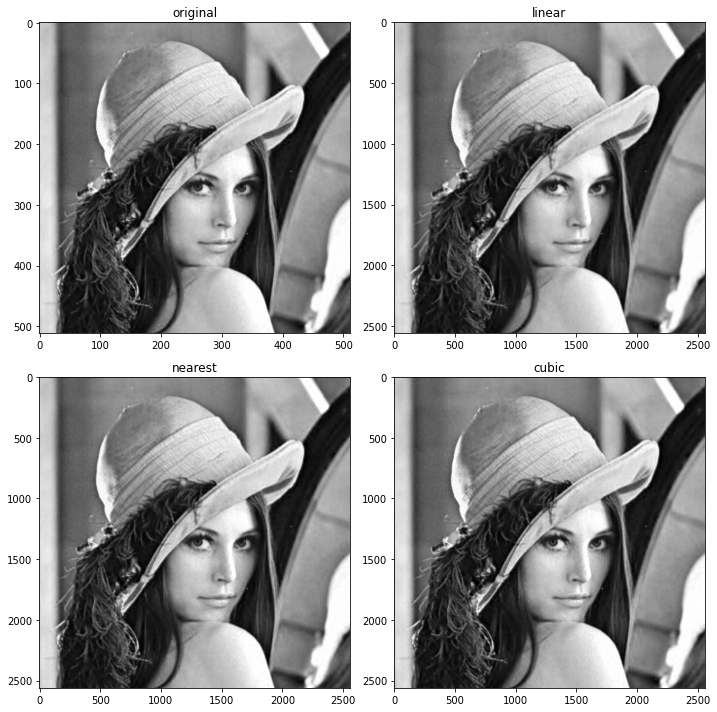

In [ ]:
import math
from google.colab import drive
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
drive.mount('/content/drive')
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/Lenna.bmp")

def resize_func(img, scale, interpolation):
    nr1, nc1 = img.shape[:2]
    nr2 = int(nr1 * scale)
    nc2 = int(nc1 * scale)
    retImg = cv2.resize(img, (nr2, nc2), interpolation = interpolation)
    return retImg

scale = eval(input("enter scale: "))
img1 = resize_func(img, scale, cv2.INTER_LINEAR)
img2 = resize_func(img, scale, cv2.INTER_NEAREST)
img3 = resize_func(img, scale, cv2.INTER_CUBIC)

titles = ['original', 'linear', 'nearest', 'cubic']
images = [img, img1, img2, img3]
plt.figure(figsize=(10, 10))

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])

plt.tight_layout()
plt.show()